<a href="https://colab.research.google.com/github/bioadex/python-project/blob/main/Scatter_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explanation of the Plotting Script:

1.  **Import Libraries**: We import `matplotlib.pyplot` for plotting and `seaborn` for enhanced visualizations.

2.  **Convert to Datetime**: The 'Date' and 'Date.1' columns in `historical_price_data` and `historical_price_q1_data` are converted to datetime objects using `pd.to_datetime()`. This ensures that dates are handled correctly for sorting and plotting.

3.  **Rename Column**: The 'Date.1' column in `historical_price_q1_data` is renamed to 'Date' to allow for a proper merge with `historical_price_data`.

4.  **Merge DataFrames**: `pd.merge()` is used to combine `historical_price_data` and `historical_price_q1_data` into a single DataFrame called `merged_data`.
    *   `on='Date'` specifies that the merge should happen based on the common 'Date' column.
    *   `how='outer'` ensures that all dates from both datasets are included, even if one dataset has dates not present in the other.

5.  **Sort Data**: The `merged_data` is sorted by the 'Date' column to ensure that the line plots connect points in chronological order.

6.  **Plotting with Seaborn**:
    *   `plt.figure(figsize=(14, 7))` creates a new figure with a specified size for better readability.
    *   `sns.lineplot()` is used twice to plot both the 'Settlement' and 'Settlement.1' series against the 'Date' column on the same graph. Each line is given a `label` for the legend.
    *   `plt.title()`, `plt.xlabel()`, `plt.ylabel()` are used to add a title and axis labels.
    *   `plt.legend()` displays the labels for each line.
    *   `plt.grid(True, linestyle='--', alpha=0.7)` adds a grid for easier reading of values.
    *   `plt.xticks(rotation=45)` rotates the date labels on the x-axis to prevent overlap.
    *   `plt.tight_layout()` adjusts plot parameters for a tight layout.
    *   `plt.show()` displays the generated plot.

In [ ]:
# Extract rows from index 1 (corresponding to row 2) to index 806 (corresponding to row 807)
# Python indexing is 0-based, so row 2 is index 1, and row 807 is index 806.
# The slice df.iloc[1:807] will include index 1 up to (but not including) index 807.
extracted_q1_rows_df = df.iloc[1:807]

# Select the 'Settlement.1' and 'Date.1' columns from the extracted rows, as these correspond to 'EEX DEB Q1'
historical_price_q1_data = extracted_q1_rows_df[['Settlement.1', 'Date.1']]

# Define the output CSV file name
output_csv_file_3 = 'eex_deb_quarterly_historical_price.csv'

# Save the extracted data to a CSV file in the same directory
historical_price_q1_data.to_csv(output_csv_file_3, index=False)

print(f"Successfully extracted 'Settlement.1' and 'Date.1' for 'EEX DEB Q1' from row 2 to 807 and saved to '{output_csv_file_3}'.")
display(historical_price_q1_data.head())

Successfully extracted 'Settlement.1' and 'Date.1' for 'EEX DEB Q1' from row 2 to 807 and saved to 'eex_deb_quarterly_historical_price.csv'.


,Settlement.1,Date.1
1,180.80,2023-01-03
2,161.51,2023-01-04
3,174.72,2023-01-05
4,171.22,2023-01-06
5,176.06,2023-01-09


In [ ]:
# Extract rows from index 1 (corresponding to row 2) to index 784 (corresponding to row 785)
# Python indexing is 0-based, so row 2 is index 1, and row 785 is index 784.
# The slice df.iloc[1:785] will include index 1 up to (but not including) index 785.
extracted_rows_df = df.iloc[1:785]

# Select the 'Settlement' and 'Date' columns from the extracted rows
historical_price_data = extracted_rows_df[['Settlement', 'Date']]

# Define the output CSV file name
output_csv_file_2 = 'eex_deb_mo_historical_price.csv'

# Save the extracted data to a CSV file in the same directory
historical_price_data.to_csv(output_csv_file_2, index=False)

print(f"Successfully extracted 'Settlement' and 'Date' from row 2 to 785 and saved to '{output_csv_file_2}'.")
display(historical_price_data.head())

Successfully extracted 'Settlement' and 'Date' from row 2 to 785 and saved to 'eex_deb_mo_historical_price.csv'.


,Settlement,Date
1,143.06,2023-01-03
2,127.03,2023-01-04
3,131.28,2023-01-05
4,125.43,2023-01-06
5,121.59,2023-01-09


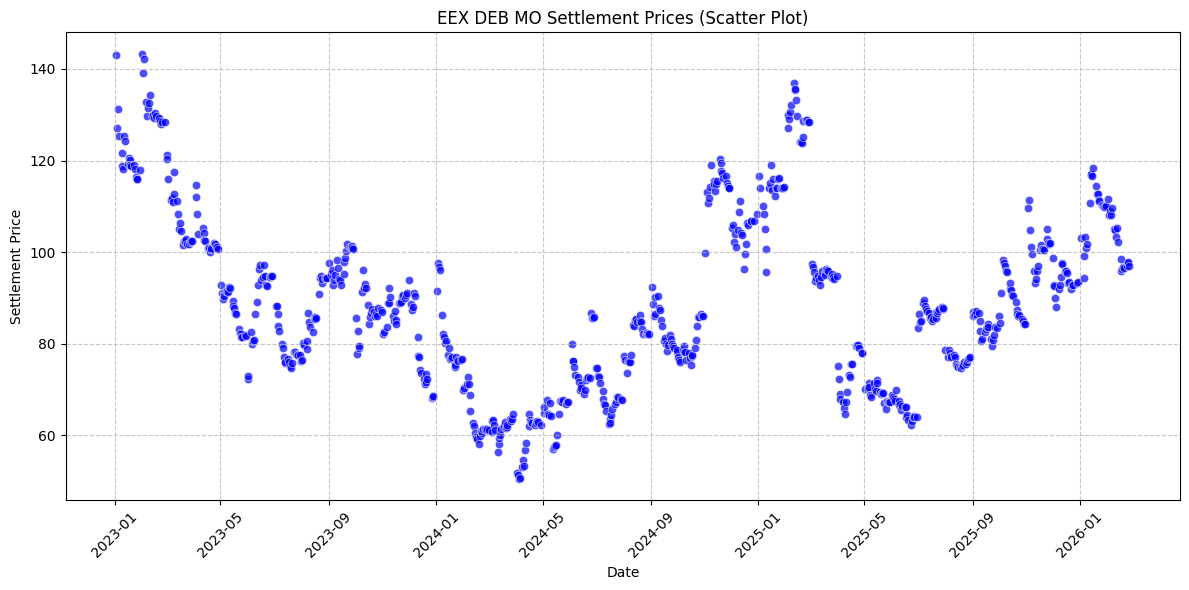

Scatter plot of Settlement prices displayed.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for 'Settlement' prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_eex_deb_mo.index, y='Settlement', data=df_eex_deb_mo, color='blue', alpha=0.7)
plt.title('EEX DEB MO Settlement Prices (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Settlement Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Scatter plot of Settlement prices displayed.")

### Scatter Plot of EEX DEB Q1 Settlement Prices

This plot visualizes the raw 'Settlement.1' prices over time from the `eex_deb_q1_historical_price.csv` dataset, showing individual price points.

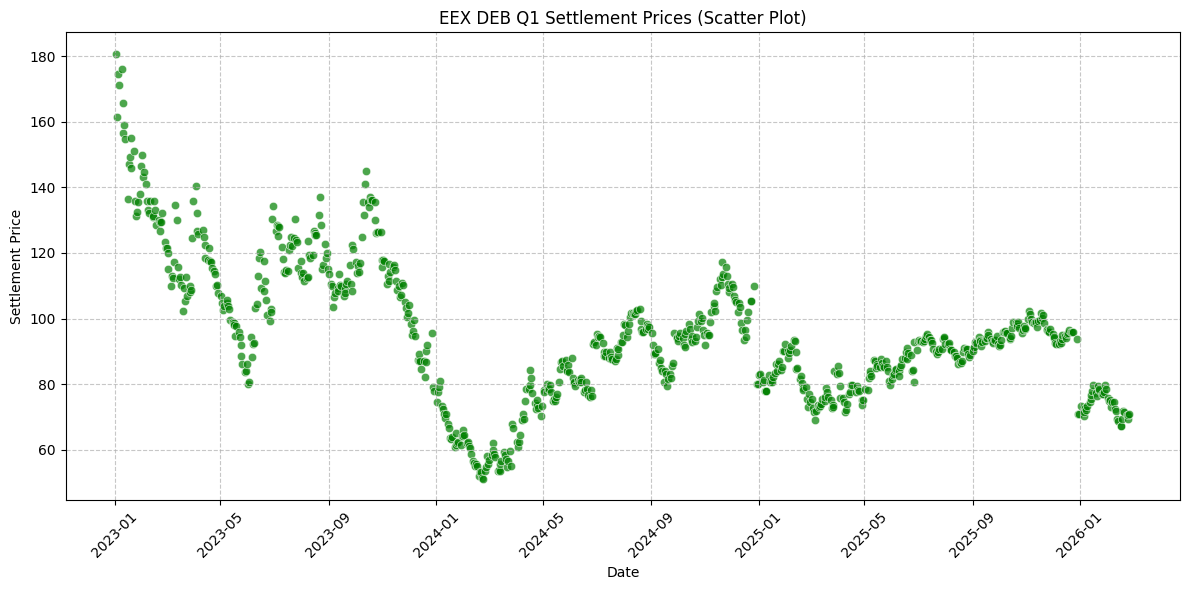

Scatter plot of EEX DEB Q1 Settlement prices displayed.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_eex_deb_q1 is loaded and 'Date.1' is datetime
try:
    if 'df_eex_deb_q1' not in locals() or df_eex_deb_q1.empty:
        df_eex_deb_q1 = pd.read_csv('eex_deb_q1_historical_price.csv')
    df_eex_deb_q1['Date.1'] = pd.to_datetime(df_eex_deb_q1['Date.1'])
except FileNotFoundError:
    print("Error: 'eex_deb_q1_historical_price.csv' not found. Please ensure it has been created and saved.")
    exit()
except Exception as e:
    print(f"An error occurred during data loading or processing: {e}")
    exit()

# Create a scatter plot for 'Settlement.1' prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date.1', y='Settlement.1', data=df_eex_deb_q1, color='green', alpha=0.7)
plt.title('EEX DEB Q1 Settlement Prices (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Settlement Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Scatter plot of EEX DEB Q1 Settlement prices displayed.")

### Scatter Plot Comparison: EEX DEB MO vs EEX DEB Q1 Settlement Prices

This plot will visualize the settlement prices from both datasets on a single scatter plot, allowing for a direct visual comparison of their trends and individual data points over time.

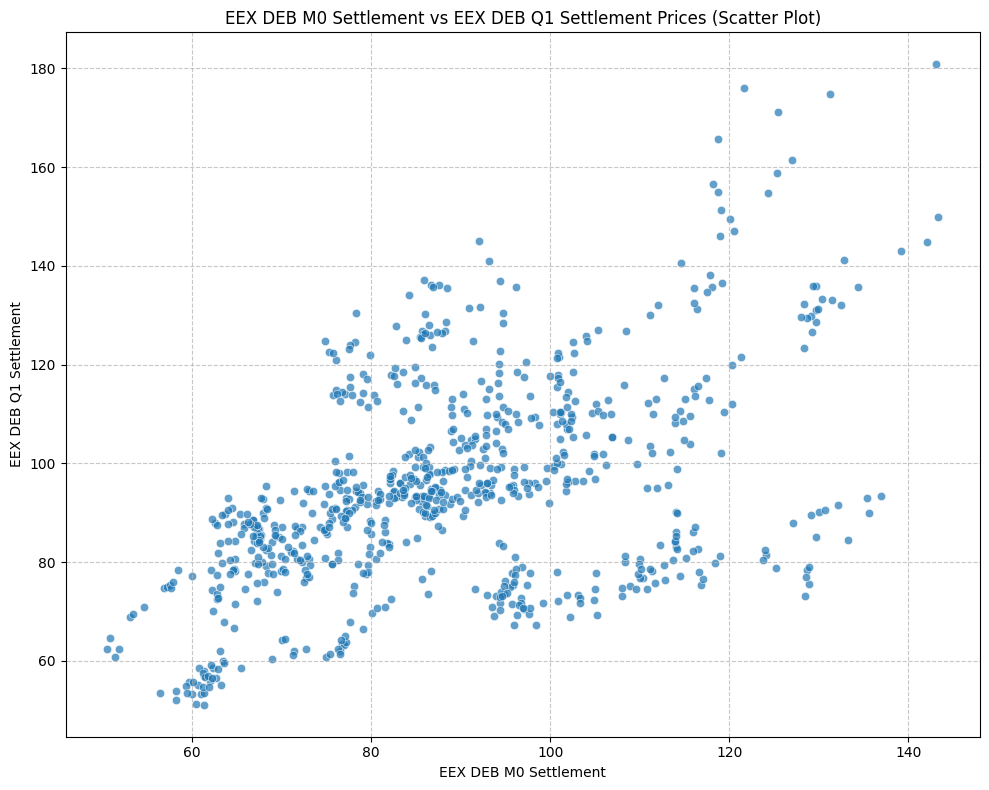

Scatter plot of EEX DEB M0 Settlement vs EEX DEB Q1 Settlement prices displayed.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataframes if they are not already loaded
try:
    if 'df_eex_deb_mo' not in locals() or df_eex_deb_mo.empty:
        df_eex_deb_mo = pd.read_csv('eex_deb_mo_historical_price.csv')
        df_eex_deb_mo['Date'] = pd.to_datetime(df_eex_deb_mo['Date'])
        df_eex_deb_mo = df_eex_deb_mo.set_index('Date')

    if 'df_eex_deb_q1' not in locals() or df_eex_deb_q1.empty:
        df_eex_deb_q1 = pd.read_csv('eex_deb_q1_historical_price.csv')
        df_eex_deb_q1['Date.1'] = pd.to_datetime(df_eex_deb_q1['Date.1'])

except FileNotFoundError as e:
    print(f"Error loading CSV file: {e}. Please ensure both CSVs are created and saved.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    exit()

# Prepare df_eex_deb_mo for merging (ensure 'Date' is a column)
if df_eex_deb_mo.index.name == 'Date':
    df_mo_temp = df_eex_deb_mo.reset_index()
else:
    df_mo_temp = df_eex_deb_mo.copy()

# Prepare df_eex_deb_q1 for merging (rename 'Date.1' to 'Date')
df_q1_temp = df_eex_deb_q1.rename(columns={'Date.1': 'Date'})[['Date', 'Settlement.1']]

# Merge the two DataFrames on the 'Date' column
merged_comparison_df = pd.merge(df_mo_temp[['Date', 'Settlement']],
                                df_q1_temp,
                                on='Date', how='outer')

# Sort the data to ensure correct plotting order if comparing over time (not needed for this specific scatter plot)
# merged_comparison_df = merged_comparison_df.sort_values(by='Date')

# Plotting the data as a scatter plot with specified axes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Settlement', y='Settlement.1', data=merged_comparison_df, alpha=0.7)

plt.title('EEX DEB M0 Settlement vs EEX DEB Q1 Settlement Prices (Scatter Plot)')
plt.xlabel('EEX DEB M0 Settlement')
plt.ylabel('EEX DEB Q1 Settlement')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Scatter plot of EEX DEB M0 Settlement vs EEX DEB Q1 Settlement prices displayed.")

### Time Series Plot of Settlement Prices

This plot visualizes the raw 'Settlement' prices over time from the `eex_deb_mo_historical_price.csv` dataset. It shows the historical price movements directly.

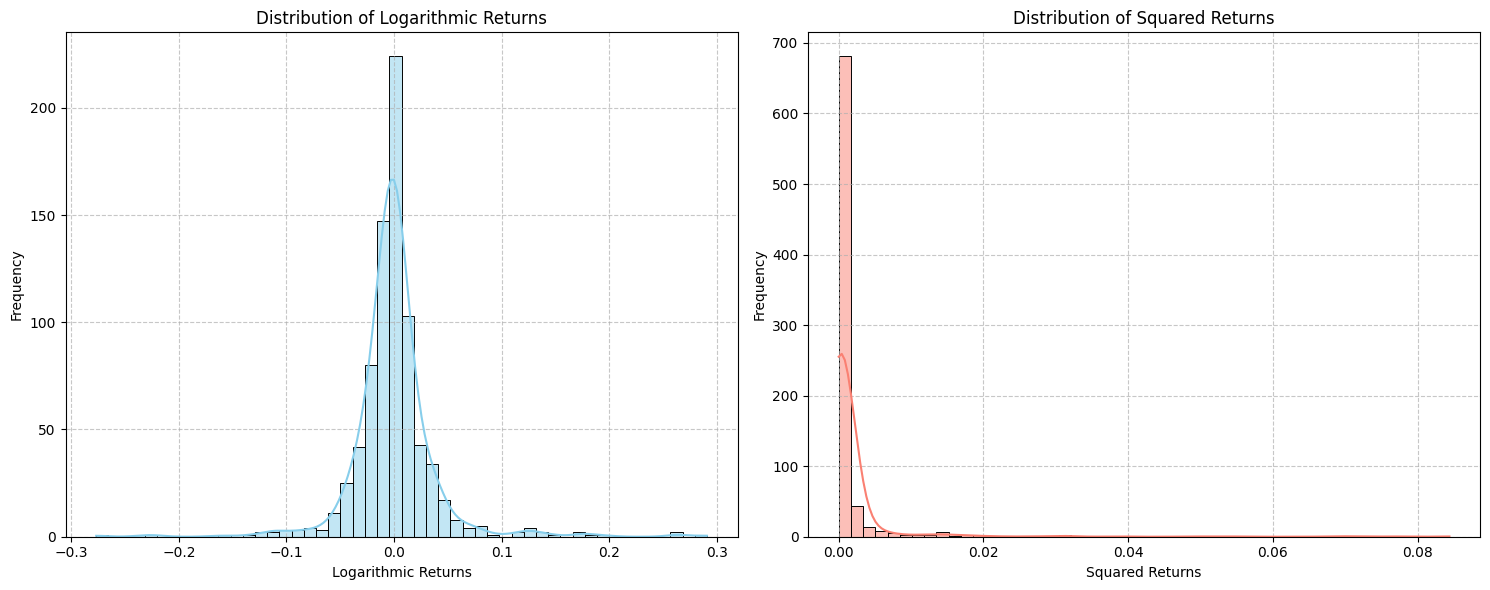

Histograms for Logarithmic and Squared Returns displayed.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot histogram for Log_Returns
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df_eex_deb_mo['Log_Returns'].dropna(), kde=True, color='skyblue', bins=50)
plt.title('Distribution of Logarithmic Returns')
plt.xlabel('Logarithmic Returns')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot histogram for Squared_Returns
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df_eex_deb_mo['Squared_Returns'].dropna(), kde=True, color='salmon', bins=50)
plt.title('Distribution of Squared Returns')
plt.xlabel('Squared Returns')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Histograms for Logarithmic and Squared Returns displayed.")

### Scatter Plot of Logarithmic Returns vs. Squared Returns

This scatter plot will help visualize the relationship between logarithmic returns and their squared counterparts. As squared returns emphasize the magnitude of returns, regardless of their direction, we expect to see a parabolic relationship if they are plotted against the logarithmic returns.

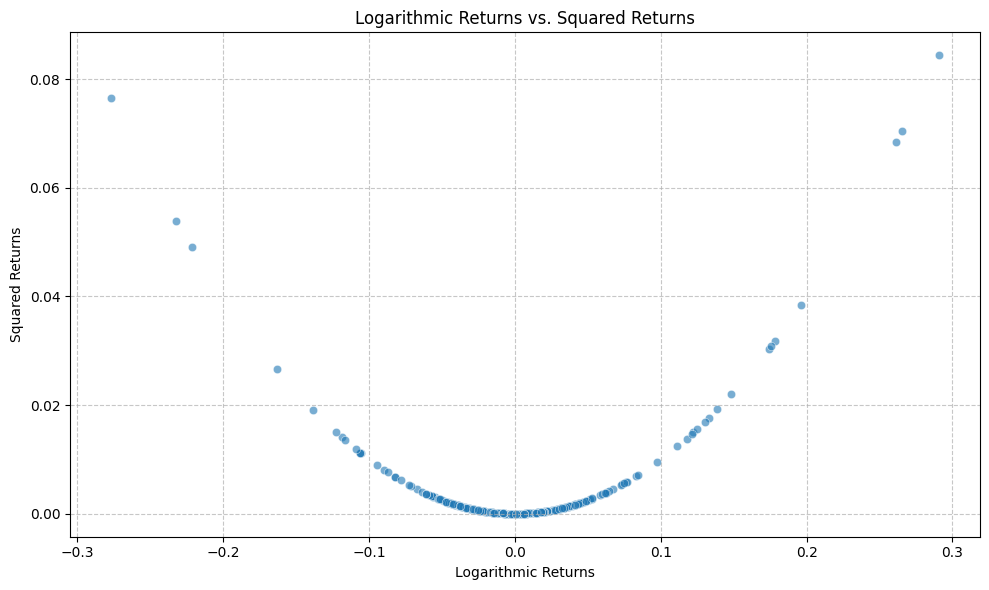

Scatter plot of Logarithmic Returns vs Squared Returns displayed.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Log_Returns vs Squared_Returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Returns', y='Squared_Returns', data=df_eex_deb_mo, alpha=0.6)
plt.title('Logarithmic Returns vs. Squared Returns')
plt.xlabel('Logarithmic Returns')
plt.ylabel('Squared Returns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Scatter plot of Logarithmic Returns vs Squared Returns displayed.")

In [14]:
import pandas as pd

try:
    df_eex_deb_q1 = pd.read_csv('eex_deb_q1_historical_price.csv')
    print("Content of 'eex_deb_q1_historical_price.csv':")
    display(df_eex_deb_q1.head())
except FileNotFoundError:
    print("Error: 'eex_deb_q1_historical_price.csv' not found. Please ensure it has been created and saved.")

Error: 'eex_deb_q1_historical_price.csv' not found. Please ensure it has been created and saved.


In [15]:
# Extract rows from index 1 (corresponding to row 2) to index 806 (corresponding to row 807)
# Python indexing is 0-based, so row 2 is index 1, and row 807 is index 806.
# The slice df.iloc[1:807] will include index 1 up to (but not including) index 807.
extracted_q1_rows_df = df.iloc[1:807]

# Select the 'Settlement.1' and 'Date.1' columns from the extracted rows, as these correspond to 'EEX DEB Q1'
historical_price_q1_data = extracted_q1_rows_df[['Settlement.1', 'Date.1']]

# Define the output CSV file name
output_csv_file_3 = 'eex_deb_q1_historical_price.csv'

# Save the extracted data to a CSV file in the same directory
historical_price_q1_data.to_csv(output_csv_file_3, index=False)

print(f"Successfully extracted 'Settlement.1' and 'Date.1' for 'EEX DEB Q1' from row 2 to 807 and saved to '{output_csv_file_3}'.")
display(historical_price_q1_data.head())

Successfully extracted 'Settlement.1' and 'Date.1' for 'EEX DEB Q1' from row 2 to 807 and saved to 'eex_deb_q1_historical_price.csv'.


,Settlement.1,Date.1
1,180.80,2023-01-03
2,161.51,2023-01-04
3,174.72,2023-01-05
4,171.22,2023-01-06
5,176.06,2023-01-09


In [16]:
import pandas as pd

try:
    df_eex_deb_q1 = pd.read_csv('eex_deb_q1_historical_price.csv')
    print("Content of 'eex_deb_q1_historical_price.csv':")
    display(df_eex_deb_q1.head())
except FileNotFoundError:
    print("Error: 'eex_deb_q1_historical_price.csv' not found. Please ensure it has been created and saved.")

Content of 'eex_deb_q1_historical_price.csv':


,Settlement.1,Date.1
0,180.80,2023-01-03
1,161.51,2023-01-04
2,174.72,2023-01-05
3,171.22,2023-01-06
4,176.06,2023-01-09


In [11]:
import pandas as pd

# Define the file path and sheet name
file_path = 'Historical_Data.xlsx'  # Assuming the file is in the Colab environment's root directory
sheet_name = 'DE_Monthly_Quarterly'

# Load the specified sheet from the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Successfully loaded sheet '{sheet_name}' from '{file_path}'.")
    # Display the first 5 rows of the DataFrame to confirm it loaded correctly
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure it's uploaded to your Colab environment.")
except ValueError as e:
    print(f"Error loading sheet '{sheet_name}': {e}. Please check if the sheet name is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded sheet 'DE_Monthly_Quarterly' from 'Historical_Data.xlsx'.


,NaN,Open,High,Low,Settlement,Close,Volume,OpenInterest,Date,ContractName,...,Last update: 27.02.2026 12:07:40,Open.1,High.1,Low.1,Settlement.1,Close.1,Volume.1,OpenInterest.1,Date.1,ContractName.1
0,EEX DEB M0,NaN,NaN,NaN,153.24,NaN,NaN,159709.0,2023-01-02,2023-01-01,...,EEX DEB Q1,165.0,184.00,165.0,180.67,184.00,47.0,120665,2023-01-02,Q2-2023
1,2023-01-01 00:00:00,NaN,NaN,NaN,143.06,NaN,NaN,159688.0,2023-01-03,2023-01-01,...,2023-01-01 00:00:00,179.0,189.01,175.0,180.80,179.50,255.0,121159,2023-01-03,Q2-2023
2,2026-02-27 00:00:00,NaN,NaN,NaN,127.03,NaN,NaN,159688.0,2023-01-04,2023-01-01,...,2026-02-27 00:00:00,173.0,174.95,161.0,161.51,162.00,422.0,121794,2023-01-04,Q2-2023
3,ascending,NaN,NaN,NaN,131.28,NaN,NaN,159688.0,2023-01-05,2023-01-01,...,ascending,163.5,175.25,160.0,174.72,170.25,291.0,122229,2023-01-05,Q2-2023
4,skipdays,NaN,NaN,NaN,125.43,NaN,NaN,159688.0,2023-01-06,2023-01-01,...,skipdays,165.0,185.51,165.0,171.22,171.00,201.0,122530,2023-01-06,Q2-2023


In [12]:
# Extract rows from index 1 (corresponding to row 2) to index 784 (corresponding to row 785)
# Python indexing is 0-based, so row 2 is index 1, and row 785 is index 784.
# The slice df.iloc[1:785] will include index 1 up to (but not including) index 785.
extracted_rows_df = df.iloc[1:785]

# Select the 'Settlement' and 'Date' columns from the extracted rows
historical_price_data = extracted_rows_df[['Settlement', 'Date']]

# Define the output CSV file name
output_csv_file_2 = 'eex_deb_mo_historical_price.csv'

# Save the extracted data to a CSV file in the same directory
historical_price_data.to_csv(output_csv_file_2, index=False)

print(f"Successfully extracted 'Settlement' and 'Date' from row 2 to 785 and saved to '{output_csv_file_2}'.")
display(historical_price_data.head())

Successfully extracted 'Settlement' and 'Date' from row 2 to 785 and saved to 'eex_deb_mo_historical_price.csv'.


,Settlement,Date
1,143.06,2023-01-03
2,127.03,2023-01-04
3,131.28,2023-01-05
4,125.43,2023-01-06
5,121.59,2023-01-09


In [13]:
import pandas as pd

try:
    df_eex_deb_mo = pd.read_csv('eex_deb_mo_historical_price.csv')
    print("Content of 'eex_deb_mo_historical_price.csv':")
    display(df_eex_deb_mo.head())
except FileNotFoundError:
    print("Error: 'eex_deb_mo_historical_price.csv' not found. Please ensure it has been created and saved.")

Content of 'eex_deb_mo_historical_price.csv':


,Settlement,Date
0,143.06,2023-01-03
1,127.03,2023-01-04
2,131.28,2023-01-05
3,125.43,2023-01-06
4,121.59,2023-01-09


In [10]:
import pandas as pd

try:
    df_eex_deb_mo = pd.read_csv('eex_deb_mo_historical_price.csv')
    print("Content of 'eex_deb_mo_historical_price.csv':")
    display(df_eex_deb_mo.head())
except FileNotFoundError:
    print("Error: 'eex_deb_mo_historical_price.csv' not found. Please ensure it has been created and saved.")

Error: 'eex_deb_mo_historical_price.csv' not found. Please ensure it has been created and saved.


In [ ]:
# Filter the DataFrame for rows where 'ContractName' is 'EEX DEB M0'
# Assuming 'ContractName' column exists in your DataFrame
# Check the unique values in 'ContractName' to ensure 'EEX DEB M0' is an exact match.
# Based on the df.head() output, the column is actually 'Last update: 27.02.2026 12:01:09' which contains 'EEX DEB M0'
# Let's verify the column name that contains 'EEX DEB M0' from the df.head() output.
# The first column appears to contain the contract names, let's assume it's the 0th column based on the head output.
# Let's rename this column for clarity if it's an unnamed column or has a complex name.

# First, identify the correct column name. From df.head(), it seems the first column has a long name
# 'Last update: 27.02.2026 12:01:09' and contains 'EEX DEB M0' in its row values.
# Let's assume the user meant the column that contains 'EEX DEB M0' in its first row.
# We will use the first column and rename it for clarity or use its current name directly.

# Let's get the name of the first column
first_column_name = df.columns[0]

# Filter the DataFrame based on the content of the first column
eex_deb_m0_df = df[df[first_column_name].astype(str).str.contains('EEX DEB M0', na=False)]

# Select the 'Settlement' and 'Date' columns from the filtered DataFrame
# Based on df.head(), 'Settlement' is column index 4 and 'Date' is column index 8.
# It's safer to use the actual column names if available.
# Let's ensure these column names are correct as they might have suffixes if duplicated.

# Check available columns
# print(df.columns)

# Assuming 'Settlement' and 'Date' without suffixes are the intended ones based on the request.
# If there are multiple 'Settlement' or 'Date' columns, we might need more clarification from the user.

# Selecting the columns
extracted_data = eex_deb_m0_df[['Settlement', 'Date']]

# Define the output CSV file name
output_csv_file = 'EEX_DEB_M0.csv'

# Save the extracted data to a CSV file in the same directory
extracted_data.to_csv(output_csv_file, index=False)

print(f"Successfully extracted 'Settlement' and 'Date' for 'EEX DEB M0' and saved to '{output_csv_file}'.")
display(extracted_data.head())

Successfully extracted 'Settlement' and 'Date' for 'EEX DEB M0' and saved to 'EEX_DEB_M0.csv'.


,Settlement,Date
0,153.24,2023-01-02


In [ ]:
import pandas as pd

# Define the file path and sheet name
file_path = 'Historical_Data.xlsx'  # Assuming the file is in the Colab environment's root directory
sheet_name = 'DE_Monthly_Quarterly'

# Load the specified sheet from the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Successfully loaded sheet '{sheet_name}' from '{file_path}'.")
    # Display the first 5 rows of the DataFrame to confirm it loaded correctly
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure it's uploaded to your Colab environment.")
except ValueError as e:
    print(f"Error loading sheet '{sheet_name}': {e}. Please check if the sheet name is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded sheet 'DE_Monthly_Quarterly' from 'Historical_Data.xlsx'.


,Last update: 27.02.2026 12:01:09,Open,High,Low,Settlement,Close,Volume,OpenInterest,Date,ContractName,...,Last update: 27.02.2026 12:07:40,Open.1,High.1,Low.1,Settlement.1,Close.1,Volume.1,OpenInterest.1,Date.1,ContractName.1
0,EEX DEB M0,NaN,NaN,NaN,153.24,NaN,NaN,159709.0,2023-01-02,2023-01-01,...,EEX DEB Q1,165.0,184.00,165.0,180.67,184.00,47.0,120665,2023-01-02,Q2-2023
1,2023-01-01 00:00:00,NaN,NaN,NaN,143.06,NaN,NaN,159688.0,2023-01-03,2023-01-01,...,2023-01-01 00:00:00,179.0,189.01,175.0,180.80,179.50,255.0,121159,2023-01-03,Q2-2023
2,2026-02-27 00:00:00,NaN,NaN,NaN,127.03,NaN,NaN,159688.0,2023-01-04,2023-01-01,...,2026-02-27 00:00:00,173.0,174.95,161.0,161.51,162.00,422.0,121794,2023-01-04,Q2-2023
3,ascending,NaN,NaN,NaN,131.28,NaN,NaN,159688.0,2023-01-05,2023-01-01,...,ascending,163.5,175.25,160.0,174.72,170.25,291.0,122229,2023-01-05,Q2-2023
4,skipdays,NaN,NaN,NaN,125.43,NaN,NaN,159688.0,2023-01-06,2023-01-01,...,skipdays,165.0,185.51,165.0,171.22,171.00,201.0,122530,2023-01-06,Q2-2023


### Explanation of the Python Script:

1.  **`import pandas as pd`**:
    *   This line imports the pandas library, which is essential for data manipulation in Python, especially with tabular data like that found in Excel files. The `as pd` part is a standard convention that allows you to refer to pandas functions using the shorter alias `pd`.

2.  **`file_path = 'Historical_Data.xlsx'`**:
    *   This line defines a string variable `file_path` that stores the name of your Excel file. It assumes the file is in the same directory as your Colab notebook. If your file is in a different location (e.g., a specific folder), you would need to provide the full path.

3.  **`sheet_name = 'DE_Monthly_Quarterly'`**:
    *   This line defines a string variable `sheet_name` that stores the exact name of the sheet you want to load from your Excel workbook.

4.  **`df = pd.read_excel(file_path, sheet_name=sheet_name)`**:
    *   This is the core line that reads your Excel data.
        *   `pd.read_excel()` is a pandas function designed specifically for reading Excel files.
        *   The first argument, `file_path`, tells pandas which Excel file to open.
        *   The `sheet_name` argument specifies which particular sheet within that Excel file you want to load. If you omit this argument, `pd.read_excel()` will typically load the first sheet by default.
    *   The data from the specified sheet is then stored in a pandas DataFrame object named `df`.

5.  **`display(df.head())`**:
    *   After loading the data, `df.head()` returns the first 5 rows of the DataFrame `df`.
    *   `display()` is a Colab-specific function (or IPython function) that provides a rich, formatted output for DataFrames, making them easy to read directly in the notebook output.

# Task
Analyze the distribution and time series of logarithmic and squared returns for the EEX DEB MO historical price data from `eex_deb_mo_historical_price.csv`.

## Load EEX DEB MO Historical Price Data

### Subtask:
Load the `eex_deb_mo_historical_price.csv` file into a pandas DataFrame. Ensure the 'Date' column is converted to datetime objects and set as the index for time-series analysis.


**Reasoning**:
The subtask requires loading a CSV file, converting a date column to datetime objects, and setting it as the DataFrame index. This code block will perform these steps for `eex_deb_mo_historical_price.csv`.



In [17]:
import pandas as pd

# 1. Load the `eex_deb_mo_historical_price.csv` file into a pandas DataFrame.
try:
    df_eex_deb_mo = pd.read_csv('eex_deb_mo_historical_price.csv')
    print("Successfully loaded 'eex_deb_mo_historical_price.csv'.")

    # 2. Convert the 'Date' column to datetime objects.
    df_eex_deb_mo['Date'] = pd.to_datetime(df_eex_deb_mo['Date'])

    # 3. Set the 'Date' column as the DataFrame's index.
    df_eex_deb_mo = df_eex_deb_mo.set_index('Date')

    print("DataFrame after converting 'Date' to datetime and setting it as index:")
    display(df_eex_deb_mo.head())
    display(df_eex_deb_mo.info())

except FileNotFoundError:
    print("Error: 'eex_deb_mo_historical_price.csv' not found. Please ensure it has been created and saved.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded 'eex_deb_mo_historical_price.csv'.
DataFrame after converting 'Date' to datetime and setting it as index:


,Settlement
Date,
2023-01-03,143.06
2023-01-04,127.03
2023-01-05,131.28
2023-01-06,125.43
2023-01-09,121.59


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 784 entries, 2023-01-03 to NaT
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Settlement  783 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


None

**Reasoning**:
The next step in the analysis is to calculate the logarithmic returns of the 'Settlement' prices from the `df_eex_deb_mo` DataFrame. This is essential for analyzing the distribution and time series of returns as specified in the main task.



In [18]:
import numpy as np

# Calculate logarithmic returns
# log_return = log(price_t / price_{t-1})
df_eex_deb_mo['Log_Returns'] = np.log(df_eex_deb_mo['Settlement'] / df_eex_deb_mo['Settlement'].shift(1))

print("DataFrame with Logarithmic Returns:")
display(df_eex_deb_mo.head())

DataFrame with Logarithmic Returns:


,Settlement,Log_Returns
Date,,
2023-01-03,143.06,NaN
2023-01-04,127.03,-0.118841
2023-01-05,131.28,0.032909
2023-01-06,125.43,-0.045585
2023-01-09,121.59,-0.031093


**Reasoning**:
Following the calculation of logarithmic returns, the next step, as per the main task, is to calculate the squared returns of the 'Settlement' prices. This is necessary for analyzing the distribution and time series of both types of returns.



In [19]:
df_eex_deb_mo['Squared_Returns'] = df_eex_deb_mo['Log_Returns']**2

print("DataFrame with Squared Returns:")
display(df_eex_deb_mo.head())

DataFrame with Squared Returns:


,Settlement,Log_Returns,Squared_Returns
Date,,,
2023-01-03,143.06,NaN,NaN
2023-01-04,127.03,-0.118841,0.014123
2023-01-05,131.28,0.032909,0.001083
2023-01-06,125.43,-0.045585,0.002078
2023-01-09,121.59,-0.031093,0.000967


**Reasoning**:
To analyze the distribution of logarithmic and squared returns, the next step is to create histograms for both 'Log_Returns' and 'Squared_Returns'. This will provide insight into their frequency distribution and shape.



**Reasoning**:
To analyze the time series aspect of the returns, the next step is to plot both 'Log_Returns' and 'Squared_Returns' over time. This will visualize their behavior and potential patterns throughout the dataset's duration.



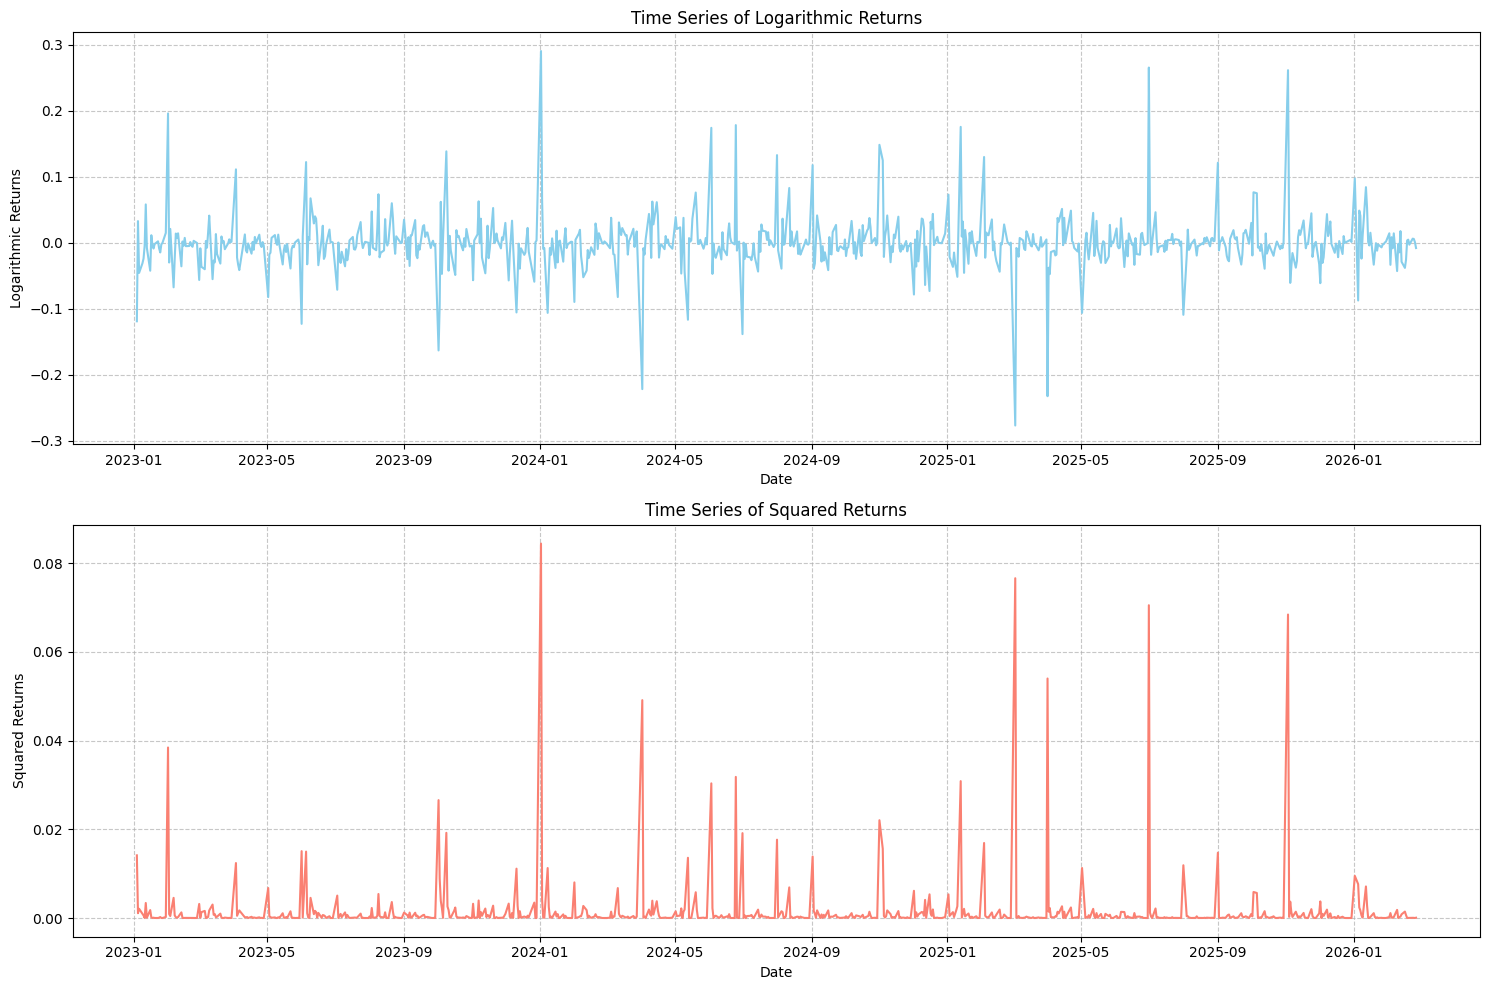

Time series plots for Logarithmic and Squared Returns displayed.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for time series plots
plt.figure(figsize=(15, 10))

# Plot time series for Log_Returns
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
sns.lineplot(x=df_eex_deb_mo.index, y='Log_Returns', data=df_eex_deb_mo, color='skyblue')
plt.title('Time Series of Logarithmic Returns')
plt.xlabel('Date')
plt.ylabel('Logarithmic Returns')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot time series for Squared_Returns
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
sns.lineplot(x=df_eex_deb_mo.index, y='Squared_Returns', data=df_eex_deb_mo, color='salmon')
plt.title('Time Series of Squared Returns')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Time series plots for Logarithmic and Squared Returns displayed.")

## Analyze Distribution of Returns and Squared Returns

### Subtask:
Generate descriptive statistics (mean, std, min, max, etc.) for both logarithmic returns and squared returns.


**Reasoning**:
To fulfill the subtask, I will generate descriptive statistics for both 'Log_Returns' and 'Squared_Returns' columns of the `df_eex_deb_mo` DataFrame using the `.describe()` method, and display the results.



In [22]:
print("\nDescriptive Statistics for Logarithmic Returns:")
display(df_eex_deb_mo['Log_Returns'].describe())

print("\nDescriptive Statistics for Squared Returns:")
display(df_eex_deb_mo['Squared_Returns'].describe())


Descriptive Statistics for Logarithmic Returns:


,Log_Returns
count,782.000000
mean,-0.000497
std,0.040143
min,-0.276745
25%,-0.014123
50%,-0.001452
75%,0.010023
max,0.290524



Descriptive Statistics for Squared Returns:


,Squared_Returns
count,782.000000
mean,0.001610
std,0.006817
min,0.000000
25%,0.000020
50%,0.000140
75%,0.000718
max,0.084404


## Final Task

### Subtask:
Provide a summary of the calculated returns and squared returns, including their distributional characteristics and observations from the time series plots.


## Summary:

### Data Analysis Key Findings

*   The `eex_deb_mo_historical_price.csv` dataset, containing 784 entries, was successfully loaded and prepared, with the 'Date' column set as the index.
*   Logarithmic returns were calculated, showing a mean of -0.000497 and a standard deviation of 0.040143. The returns ranged from a minimum of -0.276745 to a maximum of 0.290524, with a median of -0.001452.
*   Squared returns were subsequently calculated, exhibiting a mean of 0.001610 and a standard deviation of 0.006817. These values ranged from 0.000000 to 0.084404, with a median of 0.000140.
*   Histograms revealed that logarithmic returns are roughly symmetrically distributed around zero, suggesting that prices fluctuate without a strong directional bias over the entire period.
*   Histograms also showed that squared returns are heavily skewed towards zero, with a long tail indicating occasional periods of high volatility. This is expected as squared returns emphasize larger deviations from the mean.
*   Time series plots illustrated that logarithmic returns fluctuate around zero, displaying periods of both low and high volatility.
*   The time series plot for squared returns visibly demonstrated volatility clustering, where large squared returns (high volatility) tend to be followed by large squared returns, and small squared returns (low volatility) tend to be followed by small squared returns.

### Insights or Next Steps

*   The presence of volatility clustering in squared returns suggests that time-series models accounting for heteroscedasticity, such as GARCH models, would be appropriate for further analysis and forecasting of price volatility.
*   Given the near-zero mean of logarithmic returns and the observed volatility patterns, a deeper investigation into specific periods of extreme returns or volatility spikes could provide insights into underlying market events or structural changes.
